In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)
import numpy as np
import pprint
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
from math import sqrt
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Reading in and Previewing CSV File


In [ ]:
file = 'Predict Cancer Death File.csv'
df = pd.read_csv(file)
df.shape
df.head()

(5000, 36)

,Unnamed: 0,SEX,INOUT,Age,HEIGHT,WEIGHT,SMOKE,PACKS,DYSPNEA,VENTILAT,HXCOPD,ASCITES,HXCHF,HYPERMED,RENAFAIL,DIALYSIS,STEROID,WTLOSS,BLEEDDIS,TRANSFUS,PRSEPIS,PRSODM,PRBUN,PRCREAT,PRALBUM,PRBILI,PRSGOT,PRALKPH,PRWBC,PRHCT,PRPLATE,PRPTT,PRINR,OPTIME,DOpertoD,RETUR0R
0,NaN,0.0,1.0,48.0,68.0,147.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,8.0,0.4,4.0,0.6,27.0,123.0,9.7,37.0,285.0,29.0,1.0,12.0,0.0,0.0
1,NaN,0.0,0.0,51.0,64.0,95.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,140.0,15.0,1.3,3.2,0.7,15.0,98.0,9.0,27.0,248.0,36.0,1.5,178.0,1.0,0.0
2,NaN,0.0,0.0,68.0,65.0,173.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,135.0,14.0,0.5,3.2,0.9,23.0,93.0,15.8,28.0,180.0,36.0,1.3,98.0,0.0,0.0
3,NaN,0.0,0.0,55.0,63.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,133.0,9.0,0.5,4.6,0.2,32.0,93.0,8.6,45.0,275.0,31.0,0.9,338.0,1.0,0.0
4,NaN,0.0,0.0,63.0,65.0,156.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,139.0,13.0,0.9,4.3,0.6,30.0,111.0,5.7,39.0,278.0,30.0,1.0,272.0,0.0,0.0


# Data Preprocessing



In [ ]:
df.isna().sum()*100/len(df)

Unnamed: 0    1.02
SEX           0.00
INOUT         0.00
Age           0.00
HEIGHT        0.00
WEIGHT        0.00
SMOKE         0.00
PACKS         0.00
DYSPNEA       0.00
VENTILAT      0.00
HXCOPD        0.00
ASCITES       0.00
HXCHF         0.00
HYPERMED      0.00
RENAFAIL      0.00
DIALYSIS      0.00
STEROID       0.00
WTLOSS        0.00
BLEEDDIS      0.00
TRANSFUS      0.00
PRSEPIS       0.00
PRSODM        0.00
PRBUN         0.00
PRCREAT       0.00
PRALBUM       0.00
PRBILI        0.00
PRSGOT        0.00
PRALKPH       0.00
PRWBC         0.00
PRHCT         0.00
PRPLATE       0.00
PRPTT         0.00
PRINR         0.00
OPTIME        0.00
DOpertoD      0.00
RETUR0R       0.00
dtype: float64

### Assigning the Y-Variable (Outcome Variable)


In [ ]:
y = df.DOpertoD
y.value_counts()*100/len(y)

0.0    93.76
1.0     6.24
Name: BLEEDDIS, dtype: float64

# Preparation for Training Phase


In [ ]:
X = df.drop(columns='DOpertoD')
y = df['DOpertoD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#Just set your model to be an eXtreme Gradient Boosting (XGB) Classifier Model 
model = XGBClassifier()

# Fit our model to TRAIN on our data 
model.fit(X_train, y_train)

XGBClassifier()

## Testing

In [ ]:
pred_prob = model.predict_proba(X_test)
pred_prob

array([[0.4568116 , 0.5431884 ],
       [0.9810558 , 0.01894422],
       [0.98503506, 0.01496492],
       ...,
       [0.97186184, 0.02813818],
       [0.9907742 , 0.00922577],
       [0.9796707 , 0.02032929]], dtype=float32)

### Accuracy Score

In [ ]:
# This is the mean accuracy of the model on the 20% test data from above
model.score(X_test, y_test)

0.924

### ROC Curves

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


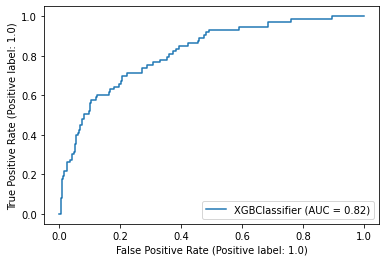

Thresholds: 
[1.6282675  0.6282675  0.5431884  0.4670694  0.45335534 0.4434271
 0.44081944 0.39426827 0.3866484  0.37741786 0.3587544  0.35511917
 0.35430977 0.34469602 0.30558264 0.30462205 0.29982436 0.29824197
 0.27509877 0.26932833 0.24337187 0.24177456 0.23605528 0.22819428
 0.21875763 0.2146362  0.2048314  0.19409229 0.19357568 0.1854404
 0.17559588 0.17013167 0.16466035 0.16239846 0.16205783 0.16147707
 0.15617731 0.15599233 0.15543072 0.15467563 0.15086477 0.14974765
 0.1404312  0.13770936 0.12159126 0.12125229 0.12027972 0.11715753
 0.11611119 0.11601257 0.10119576 0.09975654 0.09874579 0.09656223
 0.0781995  0.07812759 0.07704617 0.07691869 0.07014164 0.06999909
 0.06558957 0.06557401 0.06461968 0.06439165 0.06348223 0.06333386
 0.06270371 0.06191622 0.05784228 0.05759344 0.04725403 0.04720579
 0.04681921 0.04667002 0.04405948 0.04396687 0.04160086 0.04158669
 0.03946216 0.03934896 0.0359796  0.03582507 0.0355521  0.03547028
 0.03375439 0.03374429 0.03275984 0.03268598 0.0320

In [ ]:
#get pred prob and make the plot
pred_prob = [point[1] for point in pred_prob]

from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plot_roc_curve(model, X_test, y_test)  
plt.show()

print("Thresholds: ") 
print(thresholds)